# LLM + Kmeans

💭 **LLMs** cannot understand written text directly, we need to transform the input of this type of models. We'll use **Sentence Embedding** that consists of transforming the text into numerical vectors. This code is done intelligently, that is, phrases with similar meaning will have a more similar vector.

Typically, we can choose what the size of the numerical vector comming from this encoding is. And here is one key point:
`Thanks to the large dimension of the vector created by embedding, small variations in the data can be seen with greater precision.`

In this notebook, we will try to
- Transform our original dataset through Sentence embedding
- Create a Kmeans model
- Evaluate it

## Encoding

💭 What is intended is to get all the clients information and unify it into text that contains all its characteristics

In [2]:
# Running this cell is completely time-consuming
# You could ignore the running of this cell because the job is already done

import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
from sentence_transformers import SentenceTransformer


df = pd.read_csv("../data/train.csv", sep = ";")
# -------------------- First Step --------------------
# Text is created for each row, which contains the complete row information
def compile_text(x):

    text =  f"""
        Age: {x['age']},  
        housing load: {x['housing']}, 
        Job: {x['job']}, 
        Marital: {x['marital']}, 
        Education: {x['education']}, 
        Default: {x['default']}, 
        Balance: {x['balance']}, 
        Personal loan: {x['loan']}, 
        contact: {x['contact']}
    """

    return text

sentences = df.apply(lambda x: compile_text(x), axis=1).tolist() # a list of string

# -------------------- Second Step --------------------
# This is when the call to the transformer is made
# The numerical vector that is returned for each text will be normalized
# The vectors created have a length of 384

model = SentenceTransformer(r"sentence-transformers/paraphrase-MiniLM-L6-v2") # model from Hugging Face
output = model.encode(sentences=sentences,
         show_progress_bar=True,
         normalize_embeddings=True)

df_embedding = pd.DataFrame(output)
df_embedding.to_csv("../data/embedding_train.csv",index = False)
df_embedding

Batches: 100%|██████████| 1413/1413 [08:01<00:00,  2.93it/s]


0         1         2         3         4         5         6    \
0      0.089371  0.027528  0.063023  0.044975 -0.054418 -0.012850 -0.070131   
1      0.085275  0.031501  0.066246  0.036793 -0.071395 -0.040375 -0.019186   
2      0.121005  0.029875  0.045411  0.019558 -0.050014 -0.023849 -0.042146   
3      0.055014  0.026345  0.059065  0.023743 -0.060745  0.007165 -0.043051   
4      0.058183  0.045889  0.061221  0.050159 -0.037616 -0.036475 -0.011814   
...         ...       ...       ...       ...       ...       ...       ...   
45206  0.069572  0.057374  0.088667  0.024981 -0.070966 -0.039800 -0.025262   
45207  0.046960  0.059676  0.082323  0.045466 -0.057204 -0.015255 -0.018036   
45208  0.048488  0.072749  0.090962  0.037147 -0.050061 -0.030525 -0.035279   
45209  0.062307  0.037126  0.061555  0.024943 -0.065427  0.011139 -0.035926   
45210  0.089107  0.054634  0.067888  0.010921 -0.052644 -0.029250 -0.010917   

            7         8         9    ...       374       375       376  \
0     -0.022533 -0.017682  0.006041  ...  0.026717 -0.005122  0.055764   
1     -0.004945 -0.056932 -0.021438  ...  0.017155  0.006138  0.046330   
2     -0.018952 -0.041870 -0.003948  ...  0.024151 -0.018362  0.053265   
3     -0.013688 -0.031898 -0.001887  ...  0.023308 -0.018326  0.037705   
4     -0.024745 -0.053303 -0.025901  ...  0.021977  0.006565  0.019004   
...         ...       ...       ...  ...       ...       ...       ...   
45206  0.028524 -0.029249  0.021848  ...  0.000726 -0.018771  0.034552   
45207  0.025801 -0.037520  0.013705  ...  0.007779 -0.035331  0.020607   
45208  0.023155 -0.031951  0.018903  ...  0.002846 -0.031359  0.020872   
45209 -0.006024 -0.030161  0.019235  ...  0.028558 -0.022575  0.044311   
45210  0.023786 -0.030453  0.013307  ...  0.006467 -0.041537  0.035800   

            377       378       379       380       381       382       383  
0      0.010242 -0.032108 -0.018127  0.146969 -0.043129 -0.036687  0.042422  
1     -0.002109 -0.049859 -0.025412  0.148697 -0.029366 -0.032046  0.043983  
2      0.028722 -0.017203 -0.045644  0.148849 -0.039914 -0.027456  0.036845  
3      0.004347 -0.021044 -0.037518  0.104361 -0.040841 -0.059975  0.026863  
4      0.023848 -0.026314 -0.015430  0.140473 -0.041843 -0.065740  0.050011  
...         ...       ...       ...       ...       ...       ...       ...  
45206  0.003747 -0.033011 -0.059363  0.136304 -0.041702 -0.023181  0.058722  
45207  0.011812 -0.041296 -0.073834  0.165493 -0.043818 -0.052799  0.072776  
45208  0.021867 -0.028925 -0.072150  0.140813 -0.037865 -0.058702  0.082723  
45209 -0.000510 -0.014832 -0.035661  0.088315 -0.036298 -0.079841  0.065593  
45210  0.036726 -0.018549 -0.080158  0.135495 -0.039879 -0.038698  0.065130  

[45211 rows x 384 columns]

In [11]:
df = pd.read_csv("../data/train.csv", sep = ";")
df = df.iloc[:, 0:8]
df.shape

(45211, 8)

In [12]:
df_embedding = pd.read_csv("../data/embedding_train.csv", sep = ",")
df_embedding.shape

(45211, 384)

## Outliers

In [9]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap

# sklearn 
from sklearn.cluster import KMeans

from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer

import lightgbm as lgb
import prince

In [13]:
clf = ECOD()
clf.fit(df_embedding)

outliers = clf.predict(df_embedding)
df_embedding["outliers"] = outliers
df["outliers"] = outliers

df_embedding_no_out = df_embedding[df_embedding["outliers"] == 0]
df_embedding_no_out = df_embedding_no_out.drop(["outliers"], axis=1)

df_embedding_with_out = df_embedding.copy()
df_embedding_with_out = df_embedding_with_out.drop(["outliers"], axis=1)


In [14]:
df_embedding_no_out.shape, df_embedding_with_out.shape

((40690, 384), (45211, 384))

## Modeling

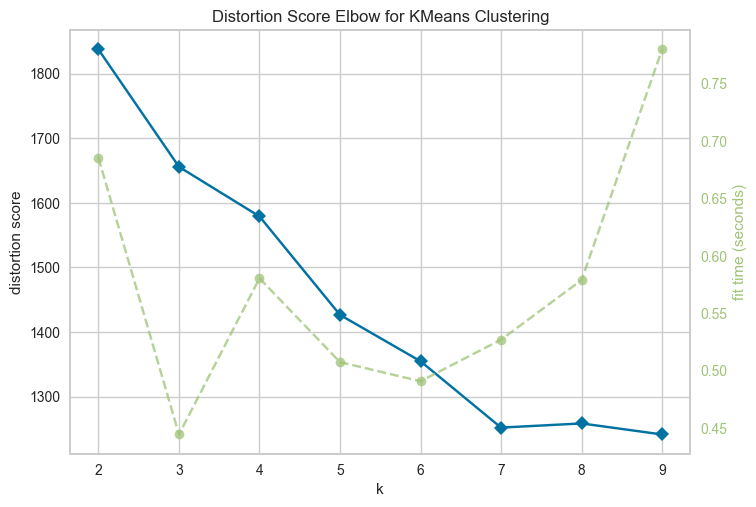

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Find the number of cluster to be chosen
km = KMeans(
    init="k-means++",
    random_state=0,
    n_init='auto'
)
visualizer = KElbowVisualizer(km, k=(2,10), locate_elbow=False)

visualizer.fit(df_embedding_no_out)
visualizer.show()

💭 The best number is 5-6

In [17]:
n_clusters = 5

In [18]:
clusters = KMeans(
    n_clusters=n_clusters,
    init="k-means++"
).fit(df_embedding_no_out)

print(clusters.inertia_)

clusters_predict = clusters.predict(df_embedding_no_out)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


1396.7613556404096


## Evaluation

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

"""
The Davies Bouldin index is defined as the average similarity measure of each cluster with its most similar cluster, 
where similarity is the ratio of within-cluster distances to between-cluster distances.
The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that 
produces better clusters.
"""
print(f"Davies bouldin score: {davies_bouldin_score(df_embedding_no_out, clusters_predict)}")

"""
Calinski Harabaz Index -> Variance Ratio Criterion.
Calinski Harabaz Index is defined as the ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The higher the index the more separable the clusters.
"""
print(f"Calinski Score: {calinski_harabasz_score(df_embedding_no_out, clusters_predict)}")


"""
The silhouette score is a metric used to calculate the goodness of fit of a clustering algorithm, 
but can also be used as a method for determining an optimal value of k (see here for more).
Its value ranges from -1 to 1.
A value of 0 indicates clusters are overlapping and either the data or the value of k is incorrect.
1 is the ideal value and indicates that clusters are very dense and nicely separated.
"""
print(f"Silhouette Score: {silhouette_score(df_embedding_no_out, clusters_predict)}")

Davies bouldin score: 1.8686673621983314
Calinski Score: 7319.275807967125
Silhouette Score: 0.17638268726485407


💭 Let's make some visualization

In [40]:
import sys  
sys.path.insert(1, '../src/')

from visualize import get_pca_nd, plot_pca_3d, plot_pca_2d

In [41]:
pca_3d_object, df_pca_3d = get_pca_nd(df_embedding_no_out, clusters_predict, ndim=3)
plot_pca_3d(df_pca_3d, opacity=1, width_line = 0.1)
print(pca_3d_object.eigenvalues_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             82.597        21.51%                     21.51%
1             45.898        11.95%                     33.46%
2             39.574        10.31%                     43.77%


💭 It can be seen that the clusters are much better differientiated than with the traditional method. This is good news. We see that the variability contained in the first 3 components of our PCA analysis is `43.77%` (from experience, when it is around 50% more or less, clear conclusions can be drawn), it is acceptable but not ideal.

In [42]:
pca_2d_object, df_pca_2d = get_pca_nd(df_embedding_no_out, clusters_predict, ndim=2)
plot_pca_2d(df_pca_2d, opacity=1, width_line = 0.1)
print(pca_2d_object.eigenvalues_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0             82.597        21.51%                     21.51%
1             45.898        11.95%                     33.46%


💭 We also can carry out a **t-SNE analysis** which is a method that allows reducing dimensionality, taking into account complex polynomial relationships.

In [ ]:
# Running this cell is completely a time-intensive task even when we sampled the original dataset !!!
from sklearn.manifold import TSNE
sampling_data = df_embedding_no_out.sample(frac=0.5, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict).sample(frac=0.5, replace=True, random_state=1)[0].values

# t-SNE 3D
df_tsne_3d = TSNE(
    n_components=3,
    learning_rate=500,
    init='random',
    perplexity=200,
    n_iter=5000
).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=['comp1', 'comp2', 'comp3'])
df_tsne_3d["cluster"] = sampling_clusters
plot_pca_3d(df_tsne_3d, title = "PCA Space", opacity=1, width_line = 0.1)

In [ ]:
# Running this cell is completely a time-intensive task even when we sampled the original dataset !!!
# t-SNE 2D
df_tsne_2d = TSNE(
    n_components=2,
    learning_rate=500,
    init='random',
    perplexity=200,
    n_iter=5000
).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=['comp1', 'comp2'])
df_tsne_2d["cluster"] = sampling_clusters
plot_pca_2d(df_tsne_2d, title = "PCA Space", opacity=0.5, width_line = 0.5)

💭 Let's explore a little how the model works, in which features are the most important and what are the main characteristics of the clusters.

To understand which variables our model KMeans relies on, we create a classification model (`LGBMClassifier`) and analyze the importance of the features

In [25]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       outliers  
0             0  
1             0  
2             1  
3             0  
4             1  
...         ...  
45206         0  
45207         0  
45208         0  
45209         0  
45210         1  

[45211 rows x 9 columns]

In [26]:
df_no_outliers = df[df["outliers"] == 0]
df_no_outliers = df_no_outliers.drop(["outliers"], axis=1)
df_no_outliers.shape

(40690, 8)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 355
[LightGBM] [Info] Number of data points in the train set: 40690, number of used features: 8
[LightGBM] [Info] Start training from score -2.078115
[LightGBM] [Info] Start training from score -2.219164
[LightGBM] [Info] Start training from score -1.006906
[LightGBM] [Info] Start training from score -1.779838
[LightGBM] [Info] Start training from score -1.460497


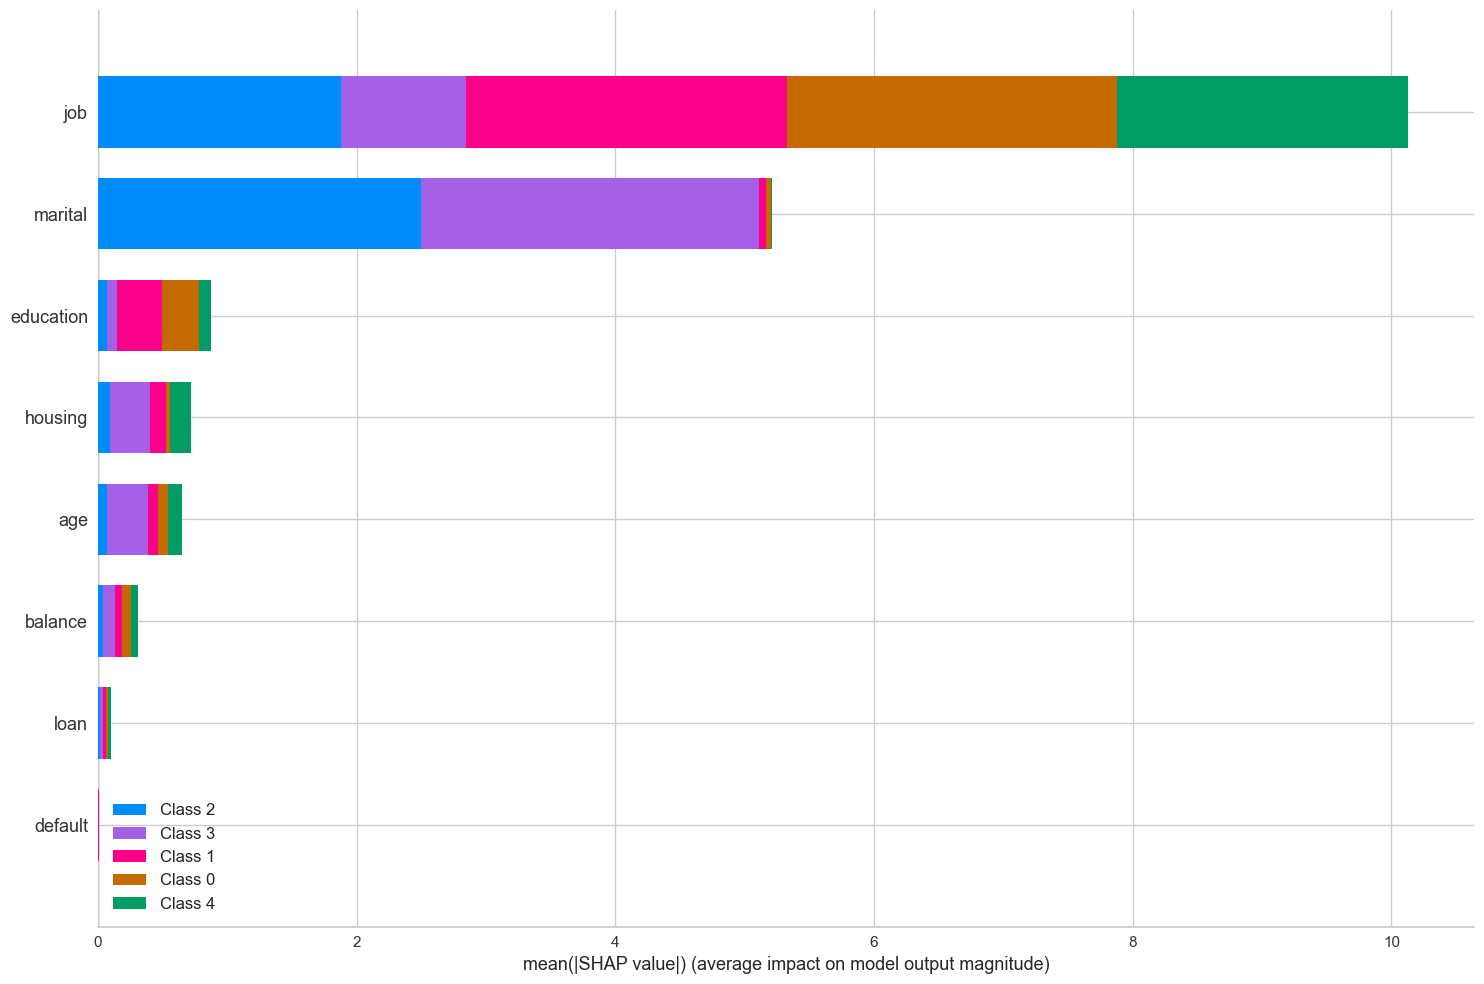

In [27]:
clf_lgb = lgb.LGBMClassifier(colsample_bytree=0.8)

for col in ["job", "marital", "education", "housing", "loan", "default"]:
    df_no_outliers[col] = df_no_outliers[col].astype('category')

clf_lgb.fit(X = df_no_outliers , y = clusters_predict)

explainer_km = shap.TreeExplainer(clf_lgb)
shap_values_km = explainer_km.shap_values(df_no_outliers)
shap.summary_plot(shap_values_km, df_no_outliers, plot_type="bar", plot_size=(15, 10))

💭 We can see that our model is heavely based on `job` and `marital` variables. On the orther hand, there are also the variables that **do not** provide much information. In a real case, a new version of model should be created without these variables with a little information.

💭 The KMeans + Embedding model is more optimal since it needs fewer variables to be able to give a good predictions

⚠️ Managers and the business are not interested in PCA, t-SNE or embedding. What they want is to be able to know what the main traits are, in this case, of their clients. 

To do this, we create a table with information about the predominant profiles that we can find in each of the clusters:

In [29]:
df_no_outliers["cluster"] = clusters_predict

df_group = df_no_outliers.groupby('cluster').agg({
    'job': lambda x: x.value_counts().index[0],
    'marital': lambda x: x.value_counts().index[0],
    'education': lambda x: x.value_counts().index[0],
    'housing': lambda x: x.value_counts().index[0],
    'loan': lambda x: x.value_counts().index[0],
    'age':'mean',
    'balance': 'mean',
    'default': lambda x: x.value_counts().index[0],
}).sort_values("job").reset_index()

df_group

cluster          job  marital  education housing loan        age  \
0        0  blue-collar  married  secondary     yes   no  39.952484   
1        1  blue-collar  married  secondary     yes   no  40.187429   
2        2   management  married  secondary      no   no  43.827391   
3        3   management   single   tertiary      no   no  33.721113   
4        4   management  married  secondary     yes   no  42.507782   

       balance default  
0  1126.081484      no  
1   998.479313      no  
2  1489.848110      no  
3  1343.385254      no  
4  1365.128428      no

## Conclusion

What was said from the `df_group` can be summarized in the following image
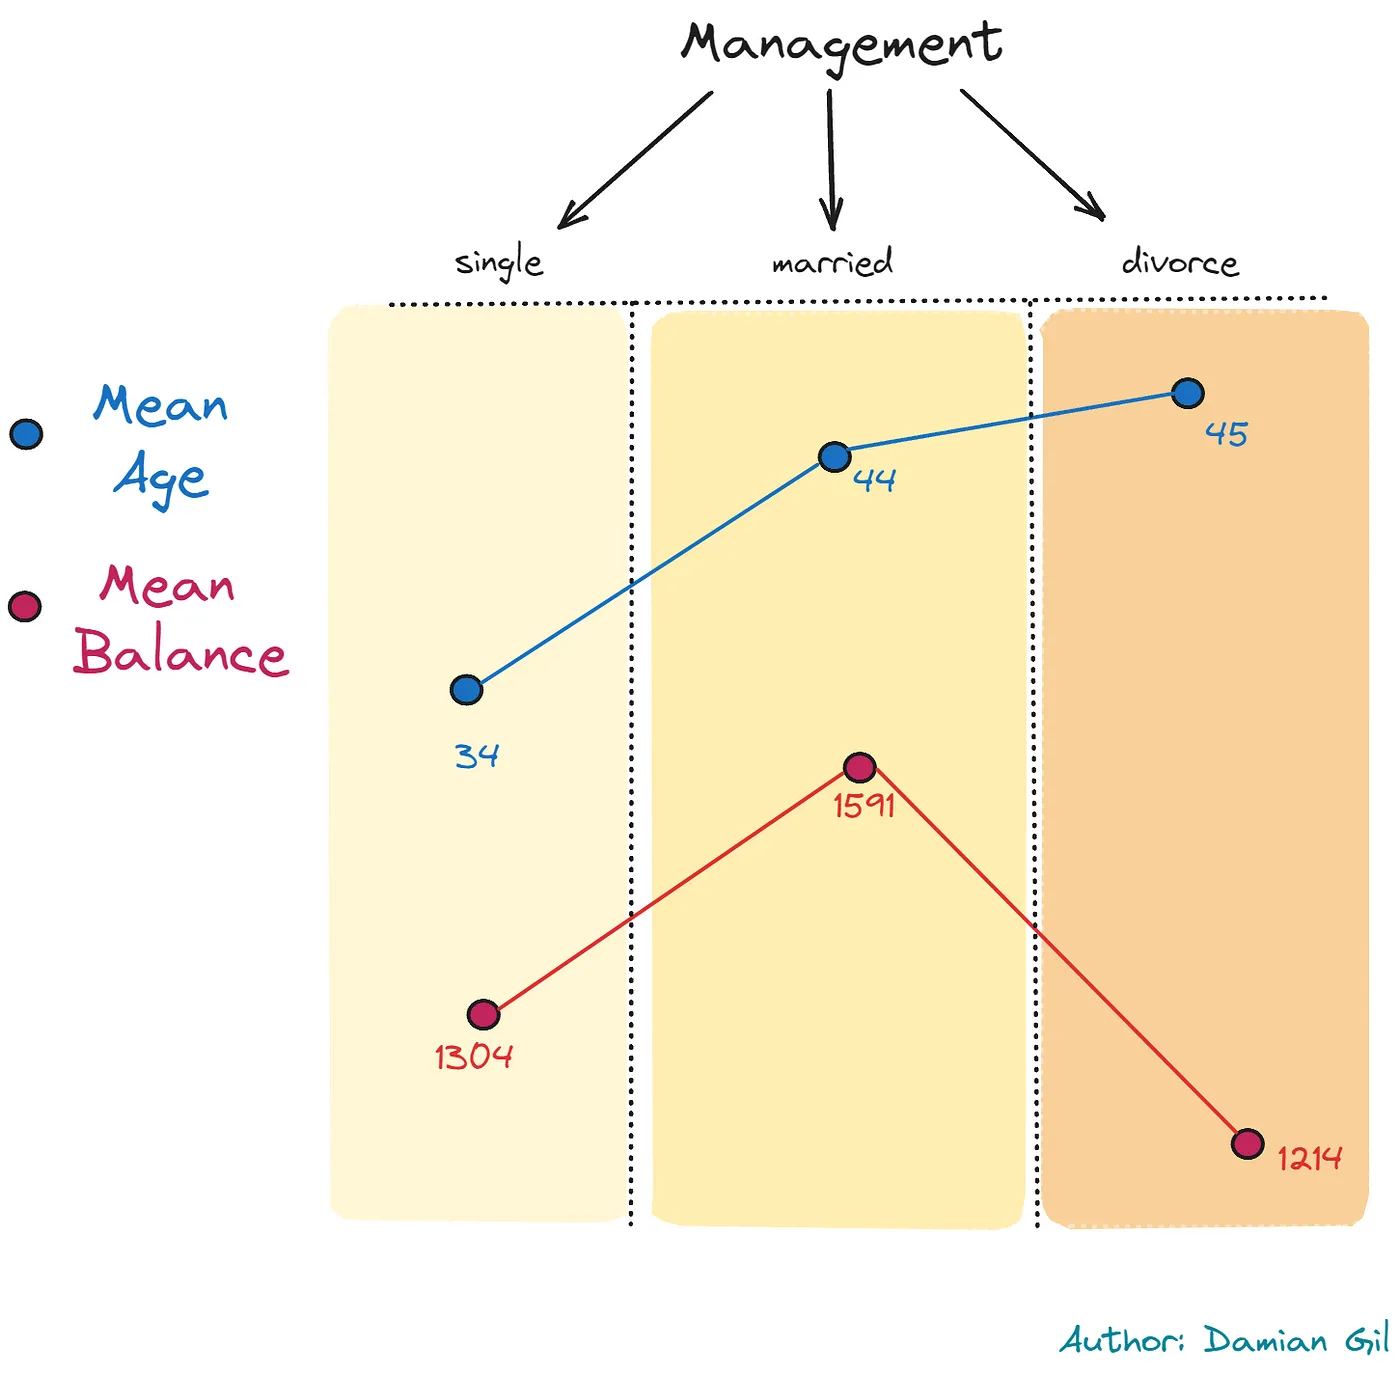